#  1.&nbsp; Getting started with Pandas

## 1.1. 🐼 What is Pandas?


In this fourth session of the Business Analytics course 💪, we'll shift our focus from foundational concepts to one of the most indispensable tools in a data analyst's toolkit: Pandas 🐼.

Pandas is a powerful and user-friendly Python library designed for working with structured data. Whether you're analyzing customer behavior, tracking business KPIs, or preparing data for machine learning, Pandas enables you to handle and transform datasets with clarity and efficiency.

Built on top of NumPy, it introduces two highly intuitive data structures—Series and DataFrames—that allow you to think in rows and columns, just like you would in Excel or SQL. What sets Pandas apart is its ability to scale from quick-and-dirty data explorations to complex transformations with just a few lines of code.

🚀 Why Pandas matters in Business Analytics:

- It provides a clean and expressive syntax for exploring data quickly and reproducibly.

- Supports seamless integration with other Python tools like Matplotlib, Seaborn, and Scikit-learn.

- Handles missing data, grouping, merging, reshaping, and even time series with ease.

It's used in consulting, finance, marketing, tech, and nearly every domain where data plays a role in decision-making.

This getting started tutorial by pandas is also a nice place to start https://pandas.pydata.org/docs/getting_started/index.html#getting-started

## 1.2. Concepts

Pandas is built around two main data structures:

- **DataFrame:** A DataFrame in pandas is a two-dimensional labeled data structure (analogous to an Excel worksheet). While an Excel workbook can contain multiple worksheets, pandas DataFrames exist independently.

- **Series:** A Series is the data structure that represents one column of a DataFrame. Working with a Series is analogous to referencing a column of a spreadsheet.

Another important concept is:

- **Index:** Every DataFrame and Series has an Index, which are labels on the rows of the data. In pandas, if no index is specified, a RangeIndex is used by default (first row = 0, second row = 1, and so on), analogous to row headings/numbers in spreadsheets.


The image below tries to illustrate Series and DataFrame concepts:

Mounted at /content/drive


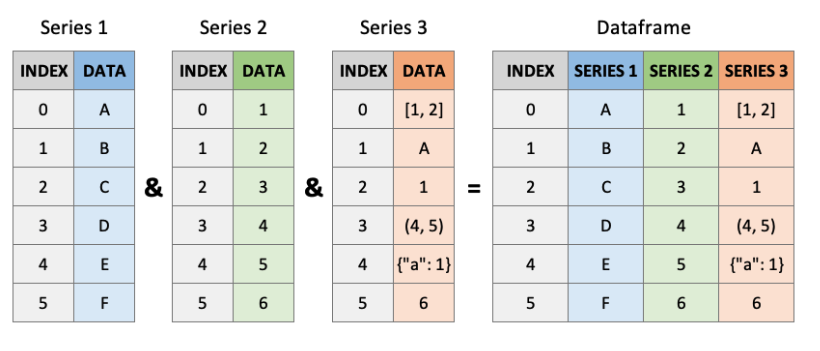

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path_image = '/content/drive/MyDrive/Session_2_data_wrangling/images/series_&_df.png'
from IPython.display import Image, display
display(Image(filename=path_image))

Let's now import the libraries

In [ ]:
import pandas as pd
import numpy as np

#### 1.2.1 Pandas Series

A Series is like a NumPy array but with labels. They are strictly 1-dimensional and can contain any data type (integers, strings, floats, objects, etc), including a mix of them. Series can be created from a scalar, a list, ndarray or dictionary using pd.Series() (note the captial “S”). Here are some example series:


By default, series are labelled with indices starting from 0. For example:

In [ ]:
pd.Series(data = [-5, 1.3, 21, 6, 3])

,0
0,-5.0
1,1.3
2,21.0
3,6.0
4,3.0


But we can add a custom index:

In [ ]:
pd.Series(data = [-5, 1.3, 21, 6, 3],
          index = ['a', 'b', 'c', 'd', 'e'])

,0
a,-5.0
b,1.3
c,21.0
d,6.0
e,3.0


We can create a Series from a dictionary:

In [ ]:
pd.Series(data = {'a': 10, 'b': 20, 'c': 30})


,0
a,10
b,20
c,30


We can access the index labels of your series using the .index attribute:

s.index

In [ ]:
s = pd.Series(data = range(5),
              index = ['A', 'B', 'C', 'D', 'E'])
print(s)
print(f"Index{s.index}")


A    0
B    1
C    2
D    3
E    4
dtype: int64
IndexIndex(['A', 'B', 'C', 'D', 'E'], dtype='object')


We can access the underlying data array using .to_numpy():



In [ ]:
s.to_numpy()

array([0, 1, 2, 3, 4])

Finally let's see how to slice series and other useful commands

In [ ]:
# Select elements by position
s.iloc[[1, 2, 3]]

,0
B,1
C,2
D,3


In [ ]:
# Select elements by index
s.loc[["A", "C"]]

,0
A,0
C,2


In [ ]:
# Select elements by value
s[s >= 2]

,0
C,2
D,3
E,4


#### 1.2.2 DataFrame

Now that we have mastered series let's jump into Dataframes !!!

Dataframes can be created using pd.DataFrame() (note the capital “D” and “F”). Like series, index and column labels of dataframes are labelled starting from 0 by default.

There are so many ways to create dataframes. Let's create them from dictionaries or ndarrays:



In [ ]:
# A simple DataFrame
data = {
    "Product": ["Apple", "Banana", "Cherry"],
    "Price": [5.5, 6.0, 7.25],
    "Quantity": [10, 8, 15]
}

df = pd.DataFrame(data)
df

,Product,Price,Quantity
0,Apple,5.50,10
1,Banana,6.00,8
2,Cherry,7.25,15


Another alternative was is from simulated values


In [ ]:
df1 = pd.DataFrame({
    'Country': np.random.choice(['USA', 'UK', 'France'], size=5),
    'Income ':  np.random.normal(loc=100_000, scale=50_000, size=5),
    'Height': np.random.uniform(low=150.0, high=190.0, size=5)
})

df1

,Country,Income,Height
0,France,89269.523683,175.820898
1,UK,102829.864006,167.695552
2,UK,42339.405297,157.007534
3,UK,84851.973946,169.481964
4,UK,125690.963659,150.304008


## 1.3. Documentation

https://pandas.pydata.org/docs/reference/frame.html

https://pandas.pydata.org/docs/getting_started/comparison/index.html

https://pandas.pydata.org/docs/getting_started/intro_tutorials/10_text_data.html


# 2.&nbsp; Reading / Writing DataFrames

In [ ]:
path_excel = '/content/drive/MyDrive/Session_2_data_wrangling/datasets/daily_stock_data_2025.xlsx'
path_csv =  '/content/drive/MyDrive/Session_2_data_wrangling/datasets/expenses.csv'
path_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
path_saved_excel = '/content/drive/MyDrive/Session_2_data_wrangling/datasets/head_daily_stock_data_2025.xlsx'

Pandas makes it extremely easy to read data from various sources:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Read data from excel file

This Excel file contains daily stock market data from January 1, 2025 until 2025-04-04 for six major tech companies: Microsoft, Apple, NVIDIA, Meta, Amazon, and Google.
It includes each company's opening price, daily high and low, closing price, and trading volume in U.S. dollars.

In [ ]:
df_ex = pd.read_excel(path_excel, index_col=0)
df_ex

,dt,Company,Ticker,Open,High,Low,Price,Volume
0,2025-01-02,Microsoft,MSFT,424.678475,425.217403,414.019854,417.742371,16896500
1,2025-01-03,Microsoft,MSFT,420.237361,423.181470,418.700465,422.502838,16662900
2,2025-01-06,Microsoft,MSFT,427.143529,433.450890,424.628583,426.993835,20573600
3,2025-01-07,Microsoft,MSFT,428.141518,429.788210,419.957915,421.524780,18139100
4,2025-01-08,Microsoft,MSFT,422.612614,426.115600,420.696473,423.710419,15054600
...,...,...,...,...,...,...,...,...
379,2025-03-31,Google,GOOGL,153.110001,155.539993,150.660004,154.639999,54603500
380,2025-04-01,Google,GOOGL,153.619995,158.100006,153.619995,157.070007,30672900
381,2025-04-02,Google,GOOGL,155.149994,158.410004,154.699997,157.039993,25041700
382,2025-04-03,Google,GOOGL,151.110001,152.779999,150.389999,150.720001,46883400


## Read data from csv file

A CSV file stands for Comma-Separated Values. It's a plain text file used to store tabular data, like you would see in an Excel spreadsheet — with rows and columns.

- Think of a CSV file as a simple table written in a text file.

- Each row is a line in the file.

- Each column is separated by a comma (that's why it's called comma-separated!).



In [ ]:
# Dataset for diferent type of expenses of an individual
df_csv = pd.read_csv(path_csv)
df_csv

,expense_type,date,amount,currency
0,Other,2025-01-07,111.82,EUR
1,Other,2025-01-28,52.04,EUR
2,Health products,2025-03-11,102.36,EUR
3,Groceries,2025-01-30,94.39,EUR
4,Restaurants,2025-01-19,91.36,EUR
...,...,...,...,...
195,Groceries,2025-01-29,67.26,EUR
196,Groceries,2025-01-10,179.01,EUR
197,Restaurants,2025-01-19,173.00,EUR
198,Restaurants,2025-03-10,31.20,EUR


## Read csv data from url

`pd.read_csv()` can read CSV files not just from your local computer, but also directly from the internet using a URL.
In this case, we're downloading a dataset hosted on the UCI Machine Learning Repository — no need to manually download or unzip anything!



In [ ]:
# The dataset uses a semicolon ; instead of a comma , to separate values. By passing sep=";", we tell pandas how to correctly parse the columns.
df_url = pd.read_csv(path_url,sep=";")
df_url

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Export data to an Excel file

To export data from a DataFrame to an excel file use `.to_excel()` method. It allows you to specify the filename, sheet name, and whether to include the index, among other options.


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html

In [ ]:
df_ex.head().to_excel(path_saved_excel)

# 3.&nbsp; Basic Dataframe manipulations


From now on we wiil work with Stock Market dataframe stored in `df_ex`

## Exploratory Data Analysis (EDA) Essentials

Before you clean, transform, or model your data, it’s essential to get a feel for what you’re working with. Pandas provides a wide range of commands to quickly inspect, summarize, and understand the structure and content of your dataset.

##### Head/tail()

The `.head()` and `.tail()` methods allow you to view the top/bottom n (default 5) rows of a dataframe

In [ ]:
df_ex.head()

,dt,Company,Ticker,Open,High,Low,Price,Volume
0,2025-01-02,Microsoft,MSFT,424.678475,425.217403,414.019854,417.742371,16896500
1,2025-01-03,Microsoft,MSFT,420.237361,423.181470,418.700465,422.502838,16662900
2,2025-01-06,Microsoft,MSFT,427.143529,433.450890,424.628583,426.993835,20573600
3,2025-01-07,Microsoft,MSFT,428.141518,429.788210,419.957915,421.524780,18139100
4,2025-01-08,Microsoft,MSFT,422.612614,426.115600,420.696473,423.710419,15054600


In [ ]:
df_ex.tail()

,dt,Company,Ticker,Open,High,Low,Price,Volume
379,2025-03-31,Google,GOOGL,153.110001,155.539993,150.660004,154.639999,54603500
380,2025-04-01,Google,GOOGL,153.619995,158.100006,153.619995,157.070007,30672900
381,2025-04-02,Google,GOOGL,155.149994,158.410004,154.699997,157.039993,25041700
382,2025-04-03,Google,GOOGL,151.110001,152.779999,150.389999,150.720001,46883400
383,2025-04-04,Google,GOOGL,148.009995,151.070007,145.380005,145.600006,62138600


The default return value is 5 rows, but we can pass in any number we like. For example, let’s take a look at the top 10 rows:

In [ ]:
df_ex.head(10)

,dt,Company,Ticker,Open,High,Low,Price,Volume
0,2025-01-02,Microsoft,MSFT,424.678475,425.217403,414.019854,417.742371,16896500
1,2025-01-03,Microsoft,MSFT,420.237361,423.181470,418.700465,422.502838,16662900
2,2025-01-06,Microsoft,MSFT,427.143529,433.450890,424.628583,426.993835,20573600
3,2025-01-07,Microsoft,MSFT,428.141518,429.788210,419.957915,421.524780,18139100
4,2025-01-08,Microsoft,MSFT,422.612614,426.115600,420.696473,423.710419,15054600
5,2025-01-10,Microsoft,MSFT,423.780259,423.860086,414.189475,418.111633,20201100
6,2025-01-13,Microsoft,MSFT,414.409054,417.662540,411.464975,416.355164,17604800
7,2025-01-14,Microsoft,MSFT,416.973928,418.900059,409.898119,414.838226,16935900
8,2025-01-15,Microsoft,MSFT,418.291284,427.293224,417.432989,425.456909,19637800
9,2025-01-16,Microsoft,MSFT,427.842128,428.630525,423.540755,423.730347,15300000


At the same time, if the aim is to get a random sample of the dataframe, then `.sample()` comes to our rescue.

In [ ]:
df_ex.sample(5)

The `.shape` attribute returns a tuple representing the number of rows and columns in your DataFrame.

In [ ]:
df_ex.shape

(384, 8)

#### Summary

`.info()` — Overview of columns, data types, and nulls.
This gives you a summary of the DataFrame structure: useful for spotting missing data and understanding data types.

In [ ]:
df_ex.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384 entries, 0 to 383
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       384 non-null    datetime64[ns]
 1   Company  384 non-null    object        
 2   Ticker   384 non-null    object        
 3   Open     384 non-null    float64       
 4   High     384 non-null    float64       
 5   Low      384 non-null    float64       
 6   Price    384 non-null    float64       
 7   Volume   384 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 27.0+ KB


`.dtypes`Shows the type of each column.

In [ ]:
df_ex.dtypes

,0
dt,datetime64[ns]
Company,object
Ticker,object
Open,float64
High,float64
Low,float64
Price,float64
Volume,int64


**Important**:  Why are Company and Ticker (and other text columns) listed as object instead of string?

In Pandas, object is the default data type for string-like values—especially when you load or create a DataFrame without explicitly specifying types.

`describe()` — Descriptive stats for numerical columns
Includes count, mean, std deviation, min, max, and percentiles.

In [ ]:
df_ex.describe()

,dt,Open,High,Low,Price,Volume
count,384,384.000000,384.000000,384.000000,384.000000,3.840000e+02
mean,2025-02-18 15:45:00,299.160683,303.113601,294.780290,298.995809,7.551808e+07
min,2025-01-02 00:00:00,98.910004,100.129997,92.110001,94.309998,8.355300e+06
25%,2025-01-27 18:00:00,183.006928,184.705298,178.826543,179.350941,2.142125e+07
50%,2025-02-19 12:00:00,225.150002,226.805332,222.567931,225.065002,3.424950e+07
75%,2025-03-13 06:00:00,406.996427,409.815773,405.187544,408.212860,5.601388e+07
max,2025-04-04 00:00:00,735.345771,740.251419,724.975032,736.015198,8.188309e+08
std,NaN,176.664866,179.100196,174.036187,176.674784,1.055016e+08


## Select rows and columns

Working with real-world datasets usually requires selecting specific columns, rows, or sub-sections of your data. Pandas offers several intuitive and flexible tools to do this:

Use `.iloc[]` when you want to select rows and columns by their integer positions.

In [ ]:
# Select the first row (position 0)
df_ex.iloc[0,:]

,2025-01-02
Company,Microsoft
Ticker,MSFT
Open,424.678475
High,425.217403
Low,414.019854
Price,417.742371
Volume,16896500


In [ ]:
# Select the first column by position
df_ex.iloc[:,0]

,dt
0,2025-01-02
1,2025-01-03
2,2025-01-06
3,2025-01-07
4,2025-01-08
...,...
379,2025-03-31
380,2025-04-01
381,2025-04-02
382,2025-04-03


In [ ]:
# Select first 3 rows and first 2 columns
df_ex.iloc[0:3, 0:2]

,Company,Ticker
dt,,
2025-01-02,Microsoft,MSFT
2025-01-03,Microsoft,MSFT
2025-01-06,Microsoft,MSFT


In [ ]:
# Select specific rows and columns by integer positions
df_ex.iloc[[0, 2], [1, 2]]

,Ticker,Open
dt,,
2025-01-02,MSFT,424.678475
2025-01-06,MSFT,427.143529


Use `.loc[]` when you want to select rows and columns by their names (labels).



In [ ]:
# Select Ticker columns
df_ex.loc[:, "Ticker"]

,Ticker
0,MSFT
1,MSFT
2,MSFT
3,MSFT
4,MSFT
...,...
379,GOOGL
380,GOOGL
381,GOOGL
382,GOOGL


In [ ]:
# Select row with index label 2
df_ex.loc[2,:]

,2
dt,2025-01-06 00:00:00
Company,Microsoft
Ticker,MSFT
Open,427.143529
High,433.45089
Low,424.628583
Price,426.993835
Volume,20573600


In [ ]:
# Select multiple rows by label
df_ex.loc[[1, 3, 5]]

,dt,Company,Ticker,Open,High,Low,Price,Volume
1,2025-01-03,Microsoft,MSFT,420.237361,423.181470,418.700465,422.502838,16662900
3,2025-01-07,Microsoft,MSFT,428.141518,429.788210,419.957915,421.524780,18139100
5,2025-01-10,Microsoft,MSFT,423.780259,423.860086,414.189475,418.111633,20201100


In [ ]:
# Select specific rows and columns by label
df_ex.loc[0:3, ["Company",'dt', "Price"]]


,Company,dt,Price
0,Microsoft,2025-01-02,417.742371
1,Microsoft,2025-01-03,422.502838
2,Microsoft,2025-01-06,426.993835
3,Microsoft,2025-01-07,421.524780


# 4.&nbsp;Working with rows

## Subset and filters

Let's imagine now that we only want to extract rows that belong to a certain Company such as Microsoft

In [ ]:
df_msft = df_ex[df_ex["Company"] == "Microsoft"]
df_msft


,dt,Company,Ticker,Open,High,Low,Price,Volume
0,2025-01-02,Microsoft,MSFT,424.678475,425.217403,414.019854,417.742371,16896500
1,2025-01-03,Microsoft,MSFT,420.237361,423.181470,418.700465,422.502838,16662900
2,2025-01-06,Microsoft,MSFT,427.143529,433.450890,424.628583,426.993835,20573600
3,2025-01-07,Microsoft,MSFT,428.141518,429.788210,419.957915,421.524780,18139100
4,2025-01-08,Microsoft,MSFT,422.612614,426.115600,420.696473,423.710419,15054600
...,...,...,...,...,...,...,...,...
59,2025-03-31,Microsoft,MSFT,372.540009,377.070007,367.239990,375.390015,35184700
60,2025-04-01,Microsoft,MSFT,374.649994,382.850006,373.230011,382.190002,19689500
61,2025-04-02,Microsoft,MSFT,377.970001,385.079987,376.619995,382.140015,16092600
62,2025-04-03,Microsoft,MSFT,374.790009,377.480011,369.350006,373.109985,30198000


Or for a certain date, for instance '2025-04-01'

In [ ]:
df_date = df_ex[df_ex["dt"] == '2025-04-01']
df_date

,dt,Company,Ticker,Open,High,Low,Price,Volume
60,2025-04-01,Microsoft,MSFT,374.649994,382.850006,373.230011,382.190002,19689500
124,2025-04-01,Apple,AAPL,219.809998,223.679993,218.899994,223.190002,36412700
188,2025-04-01,NVIDIA,NVDA,108.519997,110.199997,106.470001,110.150002,222614000
252,2025-04-01,Meta,META,570.840027,589.909973,570.000000,586.000000,12836600
316,2025-04-01,Amazon,AMZN,187.860001,193.929993,187.199997,192.169998,41267300
380,2025-04-01,Google,GOOGL,153.619995,158.100006,153.619995,157.070007,30672900


Let's combine now two conditions. For instance for Ticker NVDA, I want the rows where Price was higher than 145

In [ ]:
df_ex[(df_ex["Ticker"] == "NVDA") & (df_ex["Price"] > 145)]

,dt,Company,Ticker,Open,High,Low,Price,Volume
130,2025-01-06,NVIDIA,NVDA,148.576325,152.146004,147.806407,149.416245,265377400
140,2025-01-22,NVIDIA,NVDA,144.646706,147.776408,143.656791,147.056488,237651400
141,2025-01-23,NVIDIA,NVDA,145.036668,147.216460,143.706788,147.206467,155915500



## Sort and Indexing Keys


Sorting is a fundamental operation in data analysis, especially when you're trying to rank, prioritize, or spot trends in your dataset.

Let's sort our dataframe by date and also by price, for entries previous to the 5th of January

In [ ]:
#Sorting is a fundamental operation in data analysis, especially when you're trying to rank, prioritize, or spot trends in your dataset.
df_ex_january = df_ex[df_ex["dt"] < '2025-01-05']
df_ex_january.sort_values(by=["dt", "Price"])


,dt,Company,Ticker,Open,High,Low,Price,Volume
128,2025-01-02,NVIDIA,NVDA,135.987487,138.867227,134.617618,138.297272,198247200
320,2025-01-02,Google,GOOGL,190.430680,191.779133,187.284309,189.212082,20370800
256,2025-01-02,Amazon,AMZN,222.029999,225.149994,218.190002,220.220001,33956600
64,2025-01-02,Apple,AAPL,248.656607,248.826433,241.554430,243.582199,55740700
0,2025-01-02,Microsoft,MSFT,424.678475,425.217403,414.019854,417.742371,16896500
192,2025-01-02,Meta,META,589.195779,604.372279,587.297505,598.707336,12682300
129,2025-01-03,NVIDIA,NVDA,139.997114,144.886664,139.717141,144.456711,229322500
321,2025-01-03,Google,GOOGL,191.149851,192.987746,189.761451,191.569366,18596200
257,2025-01-03,Amazon,AMZN,222.509995,225.360001,221.619995,224.190002,27515600
65,2025-01-03,Apple,AAPL,243.092728,243.911819,241.624341,243.092728,40244100


This previous line sorts the DataFrame:

  - Primary key: dt (in ascending order)

  - Secondary key: Price (also in ascending order)



# 5.&nbsp;Working with columns

## Subset columns

We can select a subset of column by specifying their name and using `[[ ]]`

For instance, let's select columns date, Company and Price

In [ ]:
df_ex_cols = df_ex[["dt", "Company", "Price"]]
df_ex_cols

,dt,Company,Price
0,2025-01-02,Microsoft,417.742371
1,2025-01-03,Microsoft,422.502838
2,2025-01-06,Microsoft,426.993835
3,2025-01-07,Microsoft,421.524780
4,2025-01-08,Microsoft,423.710419
...,...,...,...
379,2025-03-31,Google,154.639999
380,2025-04-01,Google,157.070007
381,2025-04-02,Google,157.039993
382,2025-04-03,Google,150.720001


Recall that we could also do that by using .loc[]

In [ ]:
df_ex.loc[:, ["dt", "Company", "Price"]].head()

,dt,Company,Price
0,2025-01-02,Microsoft,417.742371
1,2025-01-03,Microsoft,422.502838
2,2025-01-06,Microsoft,426.993835
3,2025-01-07,Microsoft,421.524780
4,2025-01-08,Microsoft,423.710419


## Drop, rename columns

Let's drop Ticker column since Company is already quite informative

In [ ]:
df_drop = df_ex.drop("Ticker", axis=1)
df_drop

,dt,Company,Open,High,Low,Price,Volume
0,2025-01-02,Microsoft,424.678475,425.217403,414.019854,417.742371,16896500
1,2025-01-03,Microsoft,420.237361,423.181470,418.700465,422.502838,16662900
2,2025-01-06,Microsoft,427.143529,433.450890,424.628583,426.993835,20573600
3,2025-01-07,Microsoft,428.141518,429.788210,419.957915,421.524780,18139100
4,2025-01-08,Microsoft,422.612614,426.115600,420.696473,423.710419,15054600
...,...,...,...,...,...,...,...
379,2025-03-31,Google,153.110001,155.539993,150.660004,154.639999,54603500
380,2025-04-01,Google,153.619995,158.100006,153.619995,157.070007,30672900
381,2025-04-02,Google,155.149994,158.410004,154.699997,157.039993,25041700
382,2025-04-03,Google,151.110001,152.779999,150.389999,150.720001,46883400


Let's rename Price column to Close since it actually captures the closing price for the ticker

In [ ]:
df_ex.rename(columns={"Price": "Close"}).head()


,dt,Company,Ticker,Open,High,Low,Close,Volume
0,2025-01-02,Microsoft,MSFT,424.678475,425.217403,414.019854,417.742371,16896500
1,2025-01-03,Microsoft,MSFT,420.237361,423.181470,418.700465,422.502838,16662900
2,2025-01-06,Microsoft,MSFT,427.143529,433.450890,424.628583,426.993835,20573600
3,2025-01-07,Microsoft,MSFT,428.141518,429.788210,419.957915,421.524780,18139100
4,2025-01-08,Microsoft,MSFT,422.612614,426.115600,420.696473,423.710419,15054600


**Note:** If you execute df_ex.head() after using .rename() without any additional parameters, you'll notice that the column name is still "Price".

This happens because, by default, the .rename() method returns a new DataFrame with the changes, but it does not modify the original one unless you explicitly tell it to.

To apply the changes directly to the original DataFrame, you need to include the parameter inplace=True, like this:


```
df_ex.rename(columns={"Price": "Close"},inplace=True)

```
This will permanently rename the "Price" column to "Close" in df_ex.






In [ ]:
df_ex.head()

,dt,Company,Ticker,Open,High,Low,Price,Volume
0,2025-01-02,Microsoft,MSFT,424.678475,425.217403,414.019854,417.742371,16896500
1,2025-01-03,Microsoft,MSFT,420.237361,423.181470,418.700465,422.502838,16662900
2,2025-01-06,Microsoft,MSFT,427.143529,433.450890,424.628583,426.993835,20573600
3,2025-01-07,Microsoft,MSFT,428.141518,429.788210,419.957915,421.524780,18139100
4,2025-01-08,Microsoft,MSFT,422.612614,426.115600,420.696473,423.710419,15054600


## Creating new columns



Since Data transformation is about reshaping, enriching, or modifying our columns. One of the most commons is the creation of new columns.

For instance for our dataframe adding a column that is the difference between the maximum price and the minimum price of that day and named it daily_trade_range

In [ ]:
df_ex['daily_trade_range'] = df_ex['High'] - df_ex['Low']
df_ex.head()

,dt,Company,Ticker,Open,High,Low,Price,Volume,daily_trade_range
0,2025-01-02,Microsoft,MSFT,424.678475,425.217403,414.019854,417.742371,16896500,11.197549
1,2025-01-03,Microsoft,MSFT,420.237361,423.181470,418.700465,422.502838,16662900,4.481005
2,2025-01-06,Microsoft,MSFT,427.143529,433.450890,424.628583,426.993835,20573600,8.822307
3,2025-01-07,Microsoft,MSFT,428.141518,429.788210,419.957915,421.524780,18139100,9.830295
4,2025-01-08,Microsoft,MSFT,422.612614,426.115600,420.696473,423.710419,15054600,5.419127


Daily trade range gives insight into volatility: A wider trading range often signals more market activity or uncertainty.

## Recode variables


Let's review some transformations that we can apply

In [ ]:
# For all prices above 600 let's map them as Expensive the rest as cheap
df_ex['Price_tag'] = df_ex['Price'].apply(lambda x: 'Expensive' if x > 600 else 'Cheap')
df_ex.head()

,dt,Company,Ticker,Open,High,Low,Price,Volume,Price_tag
0,2025-01-02,Microsoft,MSFT,424.678475,425.217403,414.019854,417.742371,16896500,Cheap
1,2025-01-03,Microsoft,MSFT,420.237361,423.181470,418.700465,422.502838,16662900,Cheap
2,2025-01-06,Microsoft,MSFT,427.143529,433.450890,424.628583,426.993835,20573600,Cheap
3,2025-01-07,Microsoft,MSFT,428.141518,429.788210,419.957915,421.524780,18139100,Cheap
4,2025-01-08,Microsoft,MSFT,422.612614,426.115600,420.696473,423.710419,15054600,Cheap


In [ ]:
# Let's use now np.where instead
df_ex['Price_tag2'] = np.where(df_ex['Price'] > 600, 'Expensive', 'Cheap')
df_ex.head()

,dt,Company,Ticker,Open,High,Low,Price,Volume,Price_tag,Price_tag2
0,2025-01-02,Microsoft,MSFT,424.678475,425.217403,414.019854,417.742371,16896500,Cheap,Cheap
1,2025-01-03,Microsoft,MSFT,420.237361,423.181470,418.700465,422.502838,16662900,Cheap,Cheap
2,2025-01-06,Microsoft,MSFT,427.143529,433.450890,424.628583,426.993835,20573600,Cheap,Cheap
3,2025-01-07,Microsoft,MSFT,428.141518,429.788210,419.957915,421.524780,18139100,Cheap,Cheap
4,2025-01-08,Microsoft,MSFT,422.612614,426.115600,420.696473,423.710419,15054600,Cheap,Cheap


In [ ]:
emoji_map = {
    "Microsoft": "🧠",
    "Apple": "🍎",
    "NVIDIA": "🎮",
    "Meta": "🕶️",
    "Amazon": "📦",
    "Google": "🔍"
}
df_ex['Company_fun'] = df_ex["Company"].map(emoji_map)
df_ex.sample(5)

,dt,Company,Ticker,Open,High,Low,Price,Volume,Price_tag,Price_tag2,Company_fun
344,2025-02-07,Google,GOOGL,190.830223,190.960063,183.029210,185.126785,49315000,Cheap,Cheap,🔍
142,2025-01-24,NVIDIA,NVDA,148.356343,148.956294,141.866950,142.606873,234657600,Cheap,Cheap,🎮
219,2025-02-12,Meta,META,714.664172,726.453671,711.966560,724.735229,12016500,Expensive,Expensive,🕶️
146,2025-01-30,NVIDIA,NVDA,123.088674,124.988501,118.089134,124.638535,392925500,Cheap,Cheap,🎮
236,2025-03-10,Meta,META,607.529492,609.567657,586.348325,597.458435,21999900,Cheap,Cheap,🕶️



# 6.&nbsp; Subqueries


When working with business datasets (e.g., sales, customer activity, website metrics), it's common to ask questions like:

- What's the total revenue per product?

- What's the average rating per customer segment?

How many orders did we have each day?

To answer these questions, we use grouping and aggregation.



## Aggregate

The `.groupby()` method in Pandas splits your dataset into groups, based on one or more columns, and then allows you to apply summary functions to each group.

This follows a powerful and well-known concept in data processing:

**Split → Apply → Combine**

- Split the data into groups based on a key (e.g., Product)

- Apply a function (e.g., sum, mean, count)

- Combine the results into a new summary DataFrame

We've used pivot tables in Excel to summarize data, then `.groupby()` is our go-to equivalent in Python. It's how we roll up, summarize, and break down large datasets into digestible insights.

For example, for the Stock Market Dataset, let's try to determine the maximum price of each ticker.

In [ ]:
df_ex.groupby(['Company'])[['Price']].max()

,Price
Company,
Amazon,242.059998
Apple,247.100006
Google,206.142593
Meta,736.015198
Microsoft,446.305115
NVIDIA,149.416245


But we can go one step further and group while doing multiple aggregations. For instance max, min, std price per ticker and also total volume.

In [ ]:
df_ex.groupby("Company").agg({"Price": ["max", "min","std"], "Volume": "sum"})

Price                              Volume
                  max         min        std          sum
Company                                                  
Amazon     242.059998  171.000000  17.307687   2716416100
Apple      247.100006  188.380005  11.955767   3479110100
Google     206.142593  145.600006  15.374371   2026641300
Meta       736.015198  504.730011  50.706376   1079374400
Microsoft  446.305115  359.839996  19.812116   1501917000
NVIDIA     149.416245   94.309998  12.401080  18195485600

And we can also group by multiple columns. For instance:

 -  Let's a new column named month that captures the month of the year for particular price

 - Group by company and month will be performed to determine the average price according to those two variables

In [ ]:
df_ex["month"] = df_ex["dt"].dt.month
df_ex.head()

,dt,Company,Ticker,Open,High,Low,Price,Volume,month
0,2025-01-02,Microsoft,MSFT,424.678475,425.217403,414.019854,417.742371,16896500,1
1,2025-01-03,Microsoft,MSFT,420.237361,423.181470,418.700465,422.502838,16662900,1
2,2025-01-06,Microsoft,MSFT,427.143529,433.450890,424.628583,426.993835,20573600,1
3,2025-01-07,Microsoft,MSFT,428.141518,429.788210,419.957915,421.524780,18139100,1
4,2025-01-08,Microsoft,MSFT,422.612614,426.115600,420.696473,423.710419,15054600,1


In [ ]:
df_ex.groupby(["Company", "month"])["Price"].mean().unstack()

month,1,2,3,4
Company,,,,
Amazon,228.016001,225.848947,198.509048,184.397499
Apple,234.329359,238.446972,222.702858,209.662502
Google,195.111290,184.108490,165.313997,152.607502
Meta,631.093033,698.596387,608.905009,551.570000
Microsoft,427.545221,407.570428,387.649998,374.320000
NVIDIA,135.710019,130.342749,114.919890,104.170000


## Pivot table

Another alternative to create a spreadsheet-style summary table (like a Pivot Table in Excel) is `pd.pivot_table()`

It groups your data by one or more keys (columns), and computes an aggregate (like mean, sum, count, etc.) for the remaining values.



In [ ]:
pd.pivot_table(df_ex, values="Price", index="Company", columns="month", aggfunc="mean")

month,1,2,3,4
Company,,,,
Amazon,228.016001,225.848947,198.509048,184.397499
Apple,234.329359,238.446972,222.702858,209.662502
Google,195.111290,184.108490,165.313997,152.607502
Meta,631.093033,698.596387,608.905009,551.570000
Microsoft,427.545221,407.570428,387.649998,374.320000
NVIDIA,135.710019,130.342749,114.919890,104.170000


# 7.&nbsp; Merging, Joining and Concatenating

In real-world analytics, data rarely comes as one clean file. You'll often need to combine datasets—from databases, spreadsheets, or APIs. Pandas offers powerful tools to merge and concatenate data just like SQL joins or Excel lookups.

Let's see some examples with small dataframes.
The image below tries to capture in Venn's diagram the essence of the different joins.



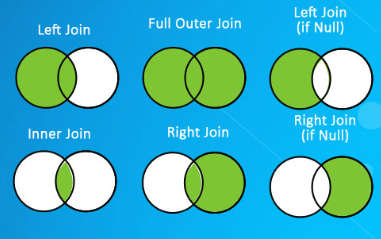

In [ ]:
path_image_joins = '/content/drive/MyDrive/Session_2_data_wrangling/images/joins_explain.png'
from IPython.display import Image, display
display(Image(filename=path_image_joins, width = 500))

In [ ]:
df1 = pd.DataFrame({"key": ["A", "B", "C", "D"], "value_df_1": np.random.randint(0,15,4)})
df1

,key,value_df_1
0,A,8
1,B,5
2,C,0
3,D,2


In [ ]:
df2 = pd.DataFrame({"key": ["B", "D", "D", "E"], "value_df_2": np.random.randint(-10,0,4)})
df2

,key,value_df_2
0,B,-6
1,D,-8
2,D,-3
3,E,-6


#### Left join

A left join returns all rows from the left DataFrame, and the matching rows from the right DataFrame based on a common key.
If there’s no match, the result will contain NaN for the missing values from the right side.

In [ ]:
df_left_join = df1.merge(df2, on=["key"], how="left")
df_left_join

,key,value_df_1,value_df_2
0,A,8,NaN
1,B,5,-6.0
2,C,0,NaN
3,D,2,-8.0
4,D,2,-3.0


#### Right join

Returns all rows from the right DataFrame, and the matching rows from the left.
Missing values from the left are filled with NaN when there's no match.

In [ ]:
df_right_join = df1.merge(df2, on=["key"], how="right")
df_right_join

,key,value_df_1,value_df_2
0,B,5.0,-6
1,D,2.0,-8
2,D,2.0,-3
3,E,NaN,-6


## Inner join

Returns only the rows where the key is present in both DataFrames.
Non-matching rows are excluded from the result entirely.

In [ ]:
df_inner_join = df1.merge(df2, on=["key"], how="inner")
df_inner_join

,key,value_df_1,value_df_2
0,B,5,-6
1,D,2,-8
2,D,2,-3


## Full outer join

Returns all rows from both DataFrames, matching where possible.
Rows with no match on either side will have NaN for missing values.

In [ ]:
df_outer_join = df1.merge(df2, on=["key"], how="outer")
df_outer_join

,key,value_df_1,value_df_2
0,A,8.0,NaN
1,B,5.0,-6.0
2,C,0.0,NaN
3,D,2.0,-8.0
4,D,2.0,-3.0
5,E,NaN,-6.0


## Append

`pd.concat()` allows to concatenate pandas objects along a particular axis,


For instance vertical stack is useful when you have multiple datasets with the same structure, e.g., monthly reports.


In [ ]:
pd.concat([df1, df2], axis=0)

,key,value_df_1,value_df_2
0,A,8.0,NaN
1,B,5.0,NaN
2,C,0.0,NaN
3,D,2.0,NaN
0,B,NaN,-6.0
1,D,NaN,-8.0
2,D,NaN,-3.0
3,E,NaN,-6.0


But we can also concatenate columns (side by side):

In [ ]:
pd.concat([df1, df2], axis=1)


,key,value_df_1,key,value_df_2
0,A,8,B,-6
1,B,5,D,-8
2,C,0,D,-3
3,D,2,E,-6


# 8.&nbsp;  Missing values NA/NaN

#### What missing values are?

A missing value (also called null, NaN, or NA) is a placeholder for data that’s absent, unavailable, or undefined in your dataset.

Examples:

- A customer didn’t fill out their age

- A sensor didn’t record a reading

- A value was removed or corrupted during collection

In Pandas, missing values are typically represented as:

In [ ]:
np.nan

nan

#### Why they matter?


Ignoring missing data can lead to:

- Incorrect statistical summaries (e.g., lower means)

- Broken visualizations

- Errors in machine learning models

- Bias in decision-making

So it's crucial to identify and handle missing values thoughtfully, depending on the context and type of analysis.

#### How to detect them

Let's create a mock dataset with some null values

In [ ]:
data = {
    "Product": ["Apple", "Banana", "Cherry", "Date"],
    "Price": [1.2, np.nan, 2.5, np.nan],
    "Quantity": [10, 5, np.nan, np.nan]
}

df_fake = pd.DataFrame(data)
print("Original DataFrame:")
df_fake

Original DataFrame:


,Product,Price,Quantity
0,Apple,1.2,10.0
1,Banana,NaN,5.0
2,Cherry,2.5,NaN
3,Date,NaN,NaN


In [ ]:
df_fake.isna()        # Returns True for each missing value

,Product,Price,Quantity
0,False,False,False
1,False,True,False
2,False,False,True
3,False,True,True


In [ ]:
df_fake.isna().sum()  # Total missing values per column

,0
Product,0
Price,2
Quantity,2


In [ ]:
# Total missing values in the dataset
df_fake.isna().sum().sum()

np.int64(4)

#### How to handle them

There’s no one-size-fits-all answer — it depends on the type of data, business case, and how much is missing. Here's a practical guide:

**Remove Missing Data**

In [ ]:
# Drop rows with any missing values:
df_clean = df_fake.dropna()
df_clean

,Product,Price,Quantity
0,Apple,1.2,10.0


**Fill Missing Data**

In [ ]:
# Fill missing Price with the mean
df_fake["Price_filled_mean"] = df_fake["Price"].fillna(df_fake["Price"].mean())
df_fake

,Product,Price,Quantity,Price_filled_mean
0,Apple,1.2,10.0,1.20
1,Banana,NaN,5.0,1.85
2,Cherry,2.5,NaN,2.50
3,Date,NaN,NaN,1.85


In [ ]:
# Fill missing Quantity with 0
df_fake["Quantity_filled_zero"] = df_fake["Quantity"].fillna(0)
df_fake

,Product,Price,Quantity,Price_filled_mean,Quantity_filled_zero
0,Apple,1.2,10.0,1.20,10.0
1,Banana,NaN,5.0,1.85,5.0
2,Cherry,2.5,NaN,2.50,0.0
3,Date,NaN,NaN,1.85,0.0


In [ ]:
# Forward fill (next known value)
df_fake["Price_ffill"] = df_fake["Price"].ffill()
df_fake

,Product,Price,Quantity,Price_filled_mean,Quantity_filled_zero,Price_ffill
0,Apple,1.2,10.0,1.20,10.0,1.2
1,Banana,NaN,5.0,1.85,5.0,1.2
2,Cherry,2.5,NaN,2.50,0.0,2.5
3,Date,NaN,NaN,1.85,0.0,2.5


In [ ]:
# Backward fill (next known value)
df_fake["Price_bfill"] = df_fake["Price"].bfill()
df_fake

,Product,Price,Quantity,Price_filled_mean,Quantity_filled_zero,Price_ffill,Price_bfill
0,Apple,1.2,10.0,1.20,10.0,1.2,1.2
1,Banana,NaN,5.0,1.85,5.0,1.2,2.5
2,Cherry,2.5,NaN,2.50,0.0,2.5,2.5
3,Date,NaN,NaN,1.85,0.0,2.5,NaN


In [ ]:
# Flag missing values in Quantity
df_fake["Quantity_missing_flag"] = df_fake["Quantity"].isna()
df_fake

,Product,Price,Quantity,Price_filled_mean,Quantity_filled_zero,Price_ffill,Price_bfill,Quantity_missing_flag
0,Apple,1.2,10.0,1.20,10.0,1.2,1.2,False
1,Banana,NaN,5.0,1.85,5.0,1.2,2.5,False
2,Cherry,2.5,NaN,2.50,0.0,2.5,2.5,True
3,Date,NaN,NaN,1.85,0.0,2.5,NaN,True


# 9.&nbsp;  Basic Visualization with Pandas

One of the most important aspects of data analysis is visualization, as it provides an immediate and intuitive understanding of patterns, trends, and relationships within the data that might be hard to detect through raw numbers alone.

While we'll explore visualizations in depth in the next session, let’s start with a brief introduction to the basics.

**Pandas** has built-in plotting functions, which make it easy to visualize your data with just one line of code.
But behind the scenes, Pandas actually uses **Matplotlib** to create those plots.


Think of it like this:

- ✅ Pandas plots are a quick and simple way to visualize data

- ✅ Matplotlib gives you full control to customize your charts

Thus make sure to import Matplotlib, even when using Pandas plots — it gives you access to fine-tuning with `plt.title()`, `plt.xlabel()`
, etc.


In [ ]:
import matplotlib.pyplot as plt


Let's see some of basic plots using pandas and matplotlib syntax.
Let's use the Stock Market dataframe

In [ ]:
df_ex.head()

,dt,Company,Ticker,Open,High,Low,Price,Volume
0,2025-01-02,Microsoft,MSFT,424.678475,425.217403,414.019854,417.742371,16896500
1,2025-01-03,Microsoft,MSFT,420.237361,423.181470,418.700465,422.502838,16662900
2,2025-01-06,Microsoft,MSFT,427.143529,433.450890,424.628583,426.993835,20573600
3,2025-01-07,Microsoft,MSFT,428.141518,429.788210,419.957915,421.524780,18139100
4,2025-01-08,Microsoft,MSFT,422.612614,426.115600,420.696473,423.710419,15054600


#### Line chart

Let's do a line chart (timeseries in this case) of the Apple stock price.

In [ ]:
df_apple = df_ex[df_ex.Company=='Apple']
df_apple.head()

,dt,Company,Ticker,Open,High,Low,Price,Volume
64,2025-01-02,Apple,AAPL,248.656607,248.826433,241.554430,243.582199,55740700
65,2025-01-03,Apple,AAPL,243.092728,243.911819,241.624341,243.092728,40244100
66,2025-01-06,Apple,AAPL,244.041682,247.058369,242.932900,244.730927,45045600
67,2025-01-07,Apple,AAPL,242.713144,245.280328,241.084944,241.944000,40856000
68,2025-01-08,Apple,AAPL,241.654299,243.442342,239.786358,242.433441,37628900


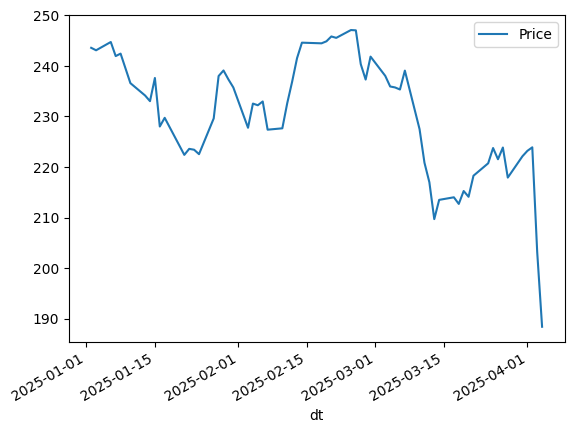

In [ ]:
# Pandas line chart for Apple stock
df_apple.plot(x="dt", y="Price", kind="line")
plt.show()

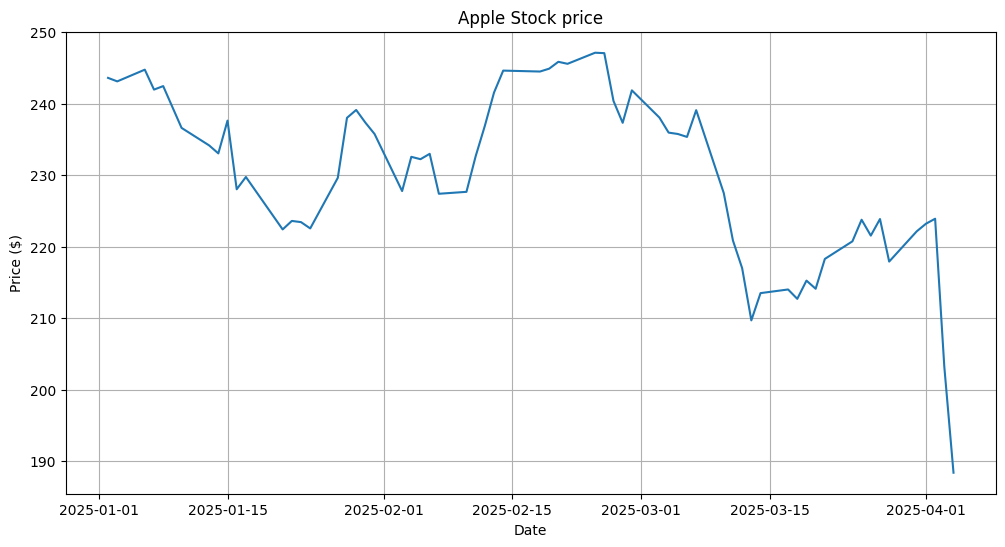

In [ ]:
# Same chart but using line chart customization
plt.figure(figsize = (12,6))
plt.plot(df_apple.dt, df_apple['Price'])
plt.title("Apple Stock price")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

#### Bar chart

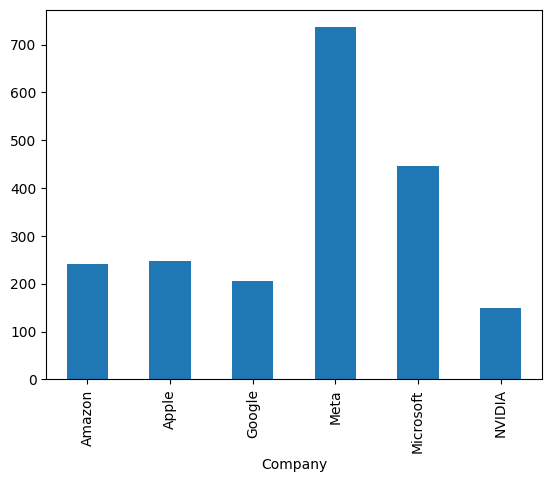

In [ ]:
# Let's plot the max price point for each company over all period
df_ex.groupby(['Company'])['Price'].max().plot(kind='bar')
plt.show()

In [ ]:
df_ex_max = df_ex.groupby(['Company'])[['Price']].max()
df_ex_max

,Price
Company,
Amazon,242.059998
Apple,247.100006
Google,206.142593
Meta,736.015198
Microsoft,446.305115
NVIDIA,149.416245


In [ ]:
df_ex_max[['Price']]

,Price
Company,
Amazon,242.059998
Apple,247.100006
Google,206.142593
Meta,736.015198
Microsoft,446.305115
NVIDIA,149.416245


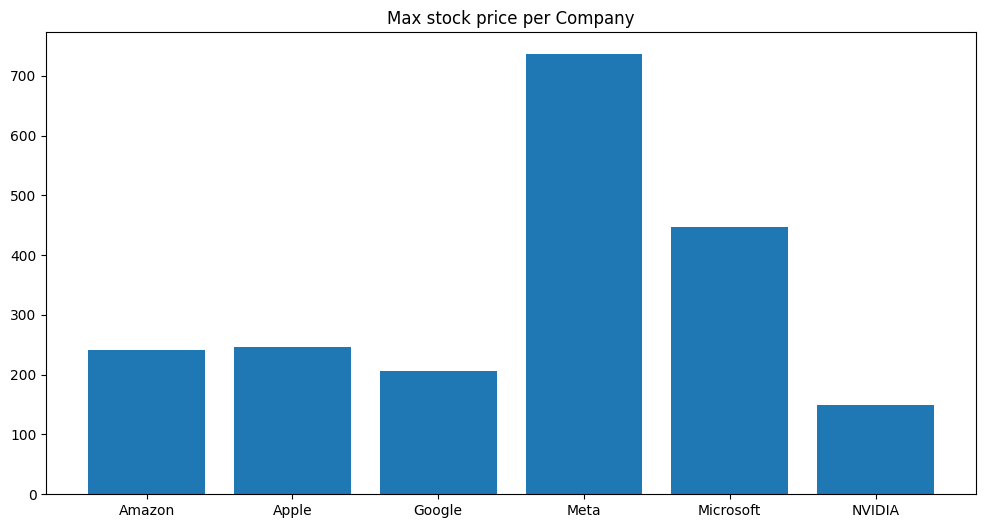

In [ ]:
# Same plot with matplotlib

# Let's build intermidiate dataframe
df_ex_max = df_ex.groupby(['Company'])[['Price']].max()

plt.figure(figsize = (12,6))
plt.title('Max stock price per Company')
plt.bar(df_ex_max.index, df_ex_max['Price'])
plt.show()

#### Histogram

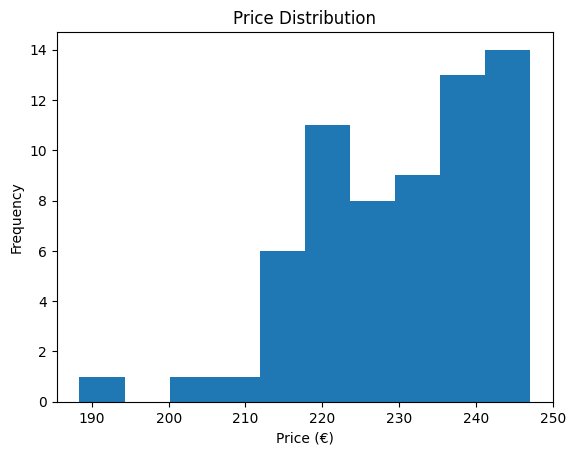

In [ ]:
# Let's do a histogram of Apple stock price
df_apple["Price"].plot(kind="hist", bins=10, title="Price Distribution")
plt.xlabel("Price (€)")
plt.show()

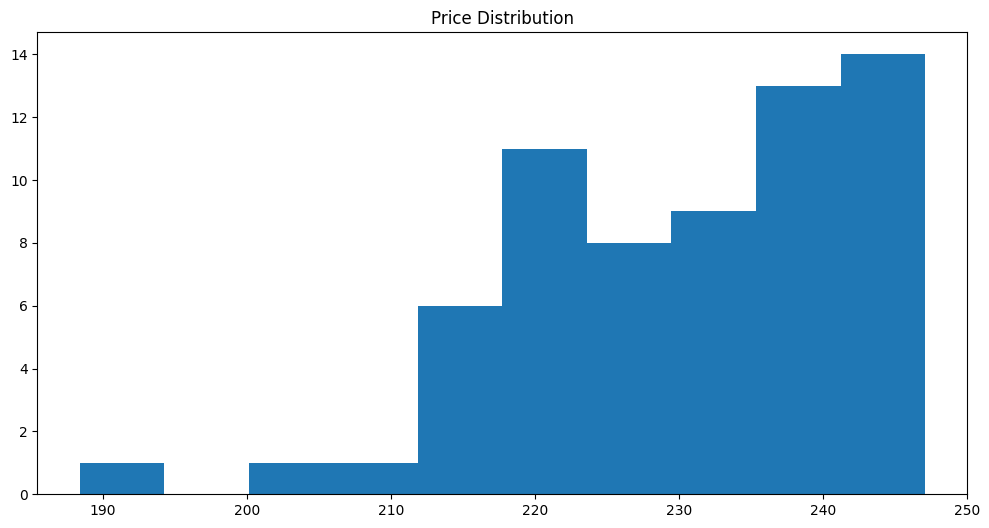

In [ ]:
# Let's do a histogram but using matplotlib
plt.figure(figsize = (12,6))
plt.title('Price Distribution')
plt.hist(df_apple['Price'], bins=10)
plt.show()

#### Pie chart

For a given date let's do a pie chart for the volume each company captures

Text(0, 0.5, '')

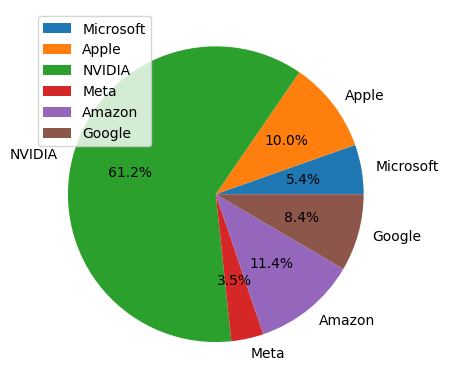

In [ ]:
df_ex_pie = df_ex[df_ex.dt == '2025-04-01']
# Let's plot
df_ex_pie.plot(kind="pie", y="Volume", labels=df_ex_pie["Company"], autopct='%1.1f%%')
plt.ylabel("")  # remove y-axis label for cleaner look

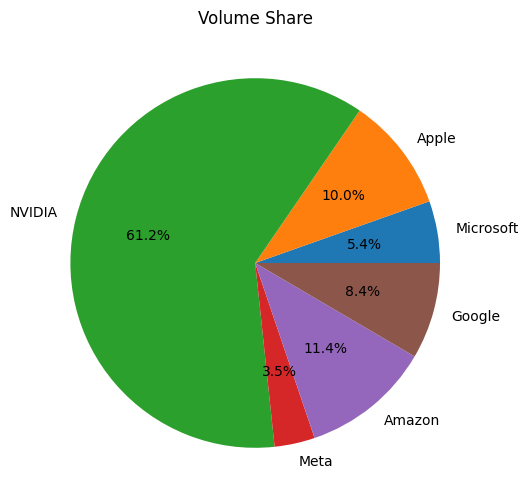

In [ ]:
# Same with Matplotlib
plt.figure(figsize = (6,6))
plt.title("Volume Share")
plt.pie(df_ex_pie['Volume'], labels=df_ex_pie['Company'], autopct='%1.1f%%')
plt.ylabel("")  # remove y-axis label for cleaner look
plt.show()

# 10.&nbsp; Final note

### 🐼 Why Bother Learning Python and Pandas if Excel Already Does Data Analysis?

✅ 1. Handle Much Larger Datasets

- Excel struggles with very large files (limit of ~1 million rows).

- Python easily processes millions (even billions) of rows with libraries like pandas, Dask, or Spark.

✅ 2. Automation of Repetitive Tasks

- In Excel, repetitive work (copy-pasting, formatting, updating) is manual and error-prone.

- In Python, you can write scripts once and automate repetitive processes without mistakes.

✅ 3. More Powerful Data Cleaning and Transformation

- Excel formulas get complicated quickly.

- Python (pandas) offers simple and readable commands for merging, reshaping, filtering, and transforming datasets.

✅ 4. Advanced Data Visualization

- Excel has basic charts.

- Python offers professional-quality visualizations (with libraries like matplotlib, seaborn, plotly) for dashboards and reports.

✅ 5. Access to Machine Learning and Predictive Analytics

- Excel has limited forecasting tools.

-  Python gives you access to machine learning (with libraries like scikit-learn, XGBoost, etc.) and allows real predictions and classifications.

✅ 6. Reproducibility and Collaboration

-  Excel files are easy to corrupt or lose track of.

- Python scripts can be version-controlled (e.g., with Git), easily shared, and precisely reproduce the same results.

✅ 7. Integration with Databases and Web Data

- In Excel, connecting to databases or APIs is complex and limited.

-  Python can connect directly to SQL databases, APIs, web scraping, cloud storage, etc.

✅ 8. Greater Career Opportunities

- Companies expect analysts to know Excel, but Python skills open doors to Data Analyst, Data Scientist, and Business Intelligence roles with higher salaries.

✅ 9. Freedom from Manual Errors

-  Manual entry in Excel = human error.

- Python scripts ensure consistency and accuracy every time.

✅ 10. Community and Ecosystem

-  Python has a huge community.

- Thousands of libraries are available for almost anything you can imagine: finance, healthcare, marketing, operations, etc.
